In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = np.genfromtxt("data/er_100k.csv", delimiter=",")

In [9]:
degree = data[1:,0]
vertices = data[1:,1]
n = 100000

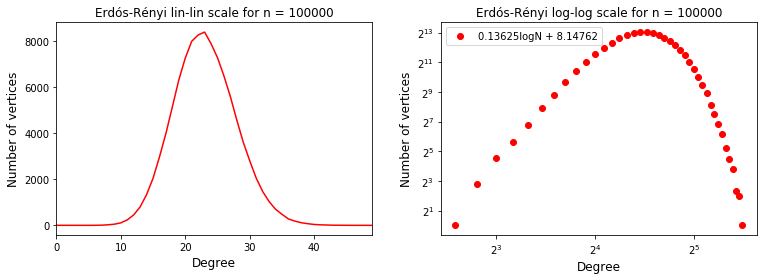

In [10]:
f, (plt1,plt2) = plt.subplots(1,2, figsize=(11,4))
#plt1.bar(degree, vertices, width = 0.7,alpha=0.7)
plt1.plot(degree, vertices, color='red')
plt1.set_xlim(min(degree), max(degree))
plt1.set_xlabel('Degree',fontsize=12)
plt1.set_ylabel('Number of vertices',fontsize=12)
plt1.set_title(f'Erdós-Rényi lin-lin scale for n = {n}',fontsize=12)

d = list()
v = list()
for i in range(len(degree)):
    if degree[i] != 0 and vertices[i] != 0:
        d.append(degree[i])
        v.append(vertices[i])
        
m, b = np.polyfit(np.log2(np.array(d)), np.log2(np.array(v)), 1)

plt2.loglog(np.array(d), v, 'yo', basex=2, basey=2, label=f'{round(m,5)}logN + {round(b,5)}', color='red')
plt2.set_xlabel('Degree',fontsize=12)
plt2.set_ylabel('Number of vertices',fontsize=12)
plt2.set_title(f"Erdós-Rényi log-log scale for n = {n}")
plt2.legend(loc="upper left")
f.subplots_adjust(hspace=0.4, wspace=1)
plt.tight_layout()
plt.show()

In [2]:
df = pd.read_csv("data/er.csv")

In [3]:
df

,size,diameter,clus_coef
0,8,2,0.386627
1,16,3,0.212762
2,32,3,0.136154
3,64,3,0.067825
4,128,3,0.031351
5,256,4,0.015154
6,512,4,0.007435
7,1024,4,0.003988
8,2048,4,0.001980
9,4096,5,0.001061


In [3]:
diameter = df['diameter']
size = df['size']

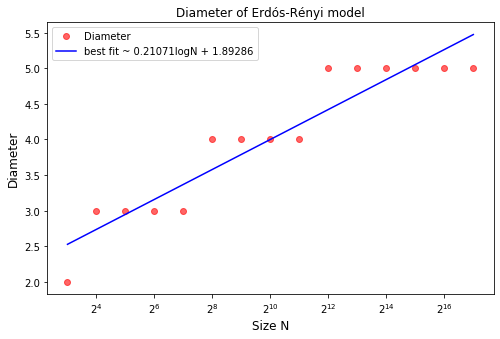

In [4]:
m, b = np.polyfit(np.log2(np.array(size)),np.array(diameter), 1)
plt.figure(figsize=(8,5))
plt.semilogx(np.array(size), np.array(diameter), 'yo', basex=2, alpha=0.6, label=f'Diameter', color='red')
plt.plot(np.array(size), (m * np.log2(np.array(size)) + b), label=f'best fit ~ {round(m,5)}logN + {round(b,5)}', color='blue')
plt.xlabel('Size N',fontsize=12)
plt.ylabel('Diameter',fontsize=12)
plt.legend()
plt.title("Diameter of Erdós-Rényi model")
plt.show()

In [5]:
clus_coef = df["clus_coef"]

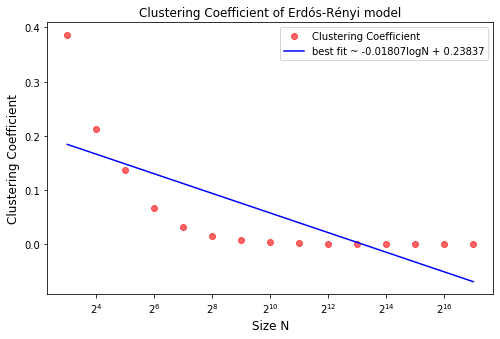

In [6]:
m, b = np.polyfit(np.log2(np.array(size)),np.array(clus_coef), 1)
plt.figure(figsize=(8,5))
plt.semilogx(np.array(size), np.array(clus_coef), 'yo', basex=2, alpha=0.6, label=f'Clustering Coefficient', color='red')
plt.plot(np.array(size), (m * np.log2(np.array(size)) + b), label=f'best fit ~ {round(m,5)}logN + {round(b,5)}', color='blue')
plt.xlabel('Size N',fontsize=12)
plt.ylabel('Clustering Coefficient',fontsize=12)
plt.legend()
plt.title("Clustering Coefficient of Erdós-Rényi model")
plt.show()